# **Machine Learning in Medical Industry - Breast Cancer Study Case**


Breast cancer is cancer that develops from breast tissue. Signs of breast cancer may include a lump in the breast, a change in breast shape, dimpling of the skin, milk rejection, fluid coming from the nipple, a newly inverted nipple, or a red or scaly patch of skin. In those with distant spread of the disease, there may be bone pain, swollen lymph nodes, shortness of breath, or yellow skin. Outcomes for breast cancer vary depending on the cancer type, the extent of disease, and the person's age. Based on data from GLOBOCAN 2022, breast cancer is the number 1 cancer suffered by Indonesian women. A total of 66,271 new cases of breast cancer occurred in Indonesia in 2022. In addition, breast cancer has the highest case in Indonesia when calculated from the overall gender cancer case.

**About the dataset**

The dataset is taken from UCI Machine Learning Repository.
There are 3 things to achieve in this code:

1.   In-Depth Data Analysis

2.   Predict Breast Cancer Risk based on clinical features
3.   Machine Learning Model Comparison with Gradient Boosting, Random Forest, and Stacking

**Attribute information:**

* (1) ID number

* (2) Diagnosis (M = malignant, B = benign)

* (3-32) Ten real-valued features are computed for each cell nucleus:

  * radius (mean of distances from center to points on the perimeter)

  * texture (standard deviation of gray-scale values)
  * perimeter
  * area
  * smoothness (local variation in radius lengths)
  * compactness (perimeter^2 / area - 1.0)
  * concavity (severity of concave portions of the contour)
  * concave points (number of concave portions of the contour)
  * symmetry
  * fractal dimension ("coastline approximation" - 1)

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


## Import Library

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
url = 'https://raw.githubusercontent.com/pkmklong/Breast-Cancer-Wisconsin-Diagnostic-DataSet/master/data.csv'
df = pd.read_csv(url)

### Sneak Peak Data

In [3]:
#Looking at the first 5 rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
#Looking at the last 5 rows of the dataset
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
#How many rows and columns in the dataset?
df.shape

(569, 33)

In [6]:
#Removing unused columns
df.drop('id', axis=1, inplace=True)
df.drop('Unnamed: 32', axis=1, inplace=True)

The data had 1 identity column (ID) and 1 'unknown' column that had no use, so both columns were removed. The identity column must be removed to prevent overfitting of the model, because if there is a distinguishing identity, the model will learn to memorize the identity instead of seeing the pattern.

In [7]:
#General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

### Handling Missing Values

In [8]:
#Checking for missing values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Exploratory Data Analysis

In [9]:
#Describing the dataset
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


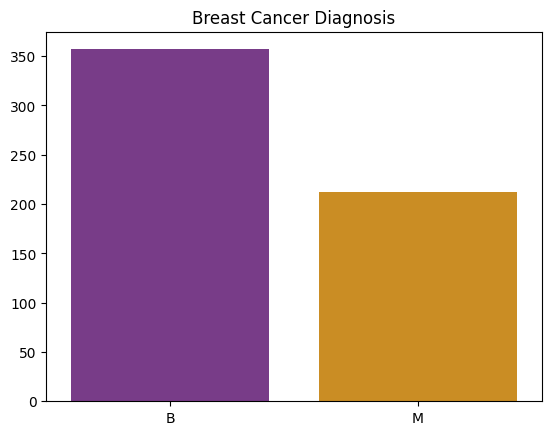

In [10]:
#Univariate analysis 'diagnosis'
data_plot  = df['diagnosis'].value_counts().to_list()
label_plot = df['diagnosis'].value_counts().index.to_list()

title = 'Breast Cancer Diagnosis'

plot       = sns.barplot(x = label_plot, y = data_plot, palette = 'CMRmap')
plot_title = plt.title(title)

plt.show()

In [11]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

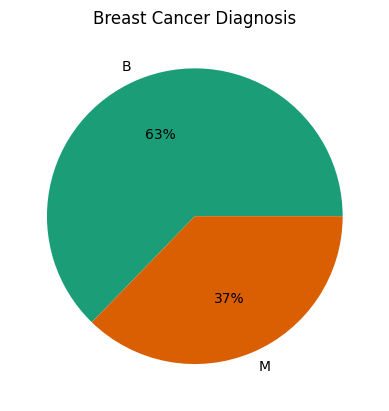

In [12]:
color = sns.color_palette('Dark2')

plot       = plt.pie(data_plot, labels=label_plot, colors=color, autopct='%.0f%%')
plot_title = plt.title(title)

plt.show()

Create a chart to see the distribution of diagnosis data.In the dataset, there are 357 patients with benign status, and 212 patients with malignant status. With this, 63% of patients in the dataset have benign status while 37% had breast cancer (malignant).

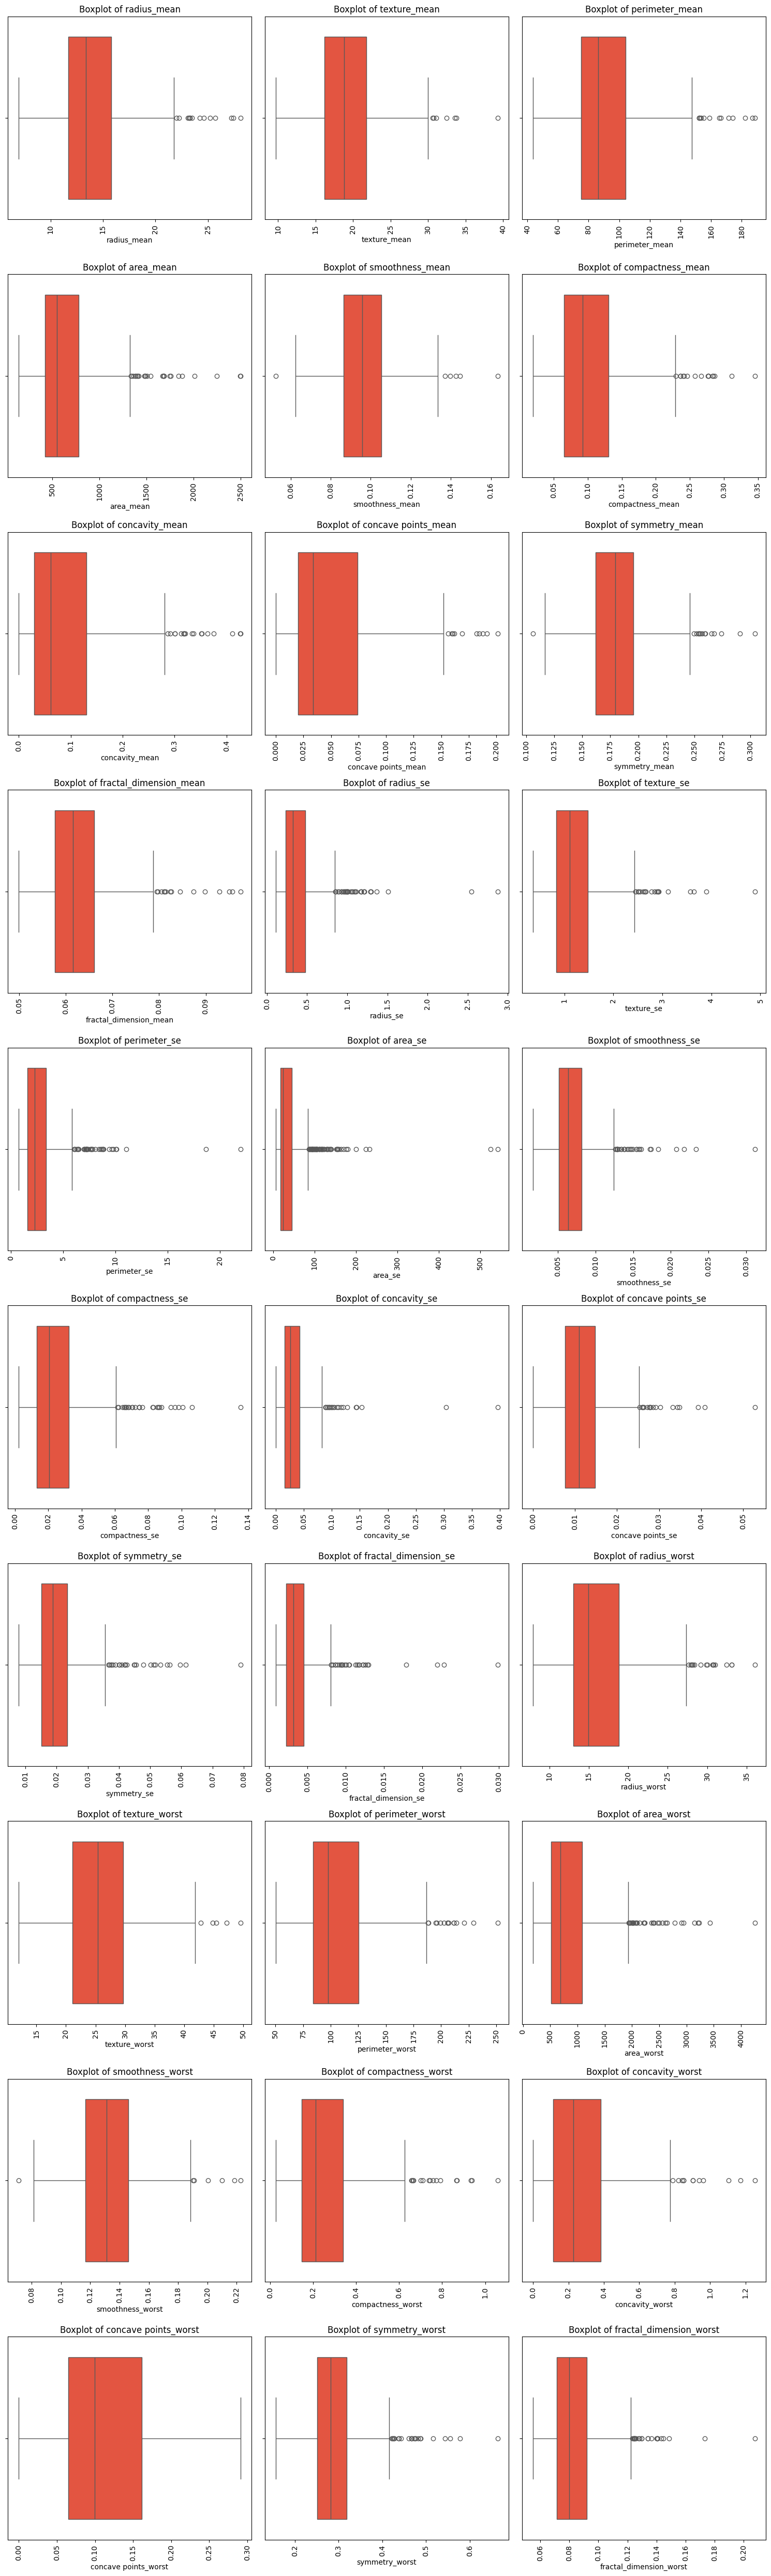

In [13]:
#Boxplot of numeric variables
column_name_list_num = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Boxplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.boxplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Boxplot of" + " " + var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

A box plot is a visualization created to illustrate the shape of the distribution and spread of data.The box plot shows the quartiles, distance between quartiles, minimum and maximum limits, and outliers in the data. A box plot is created for each numerical column.

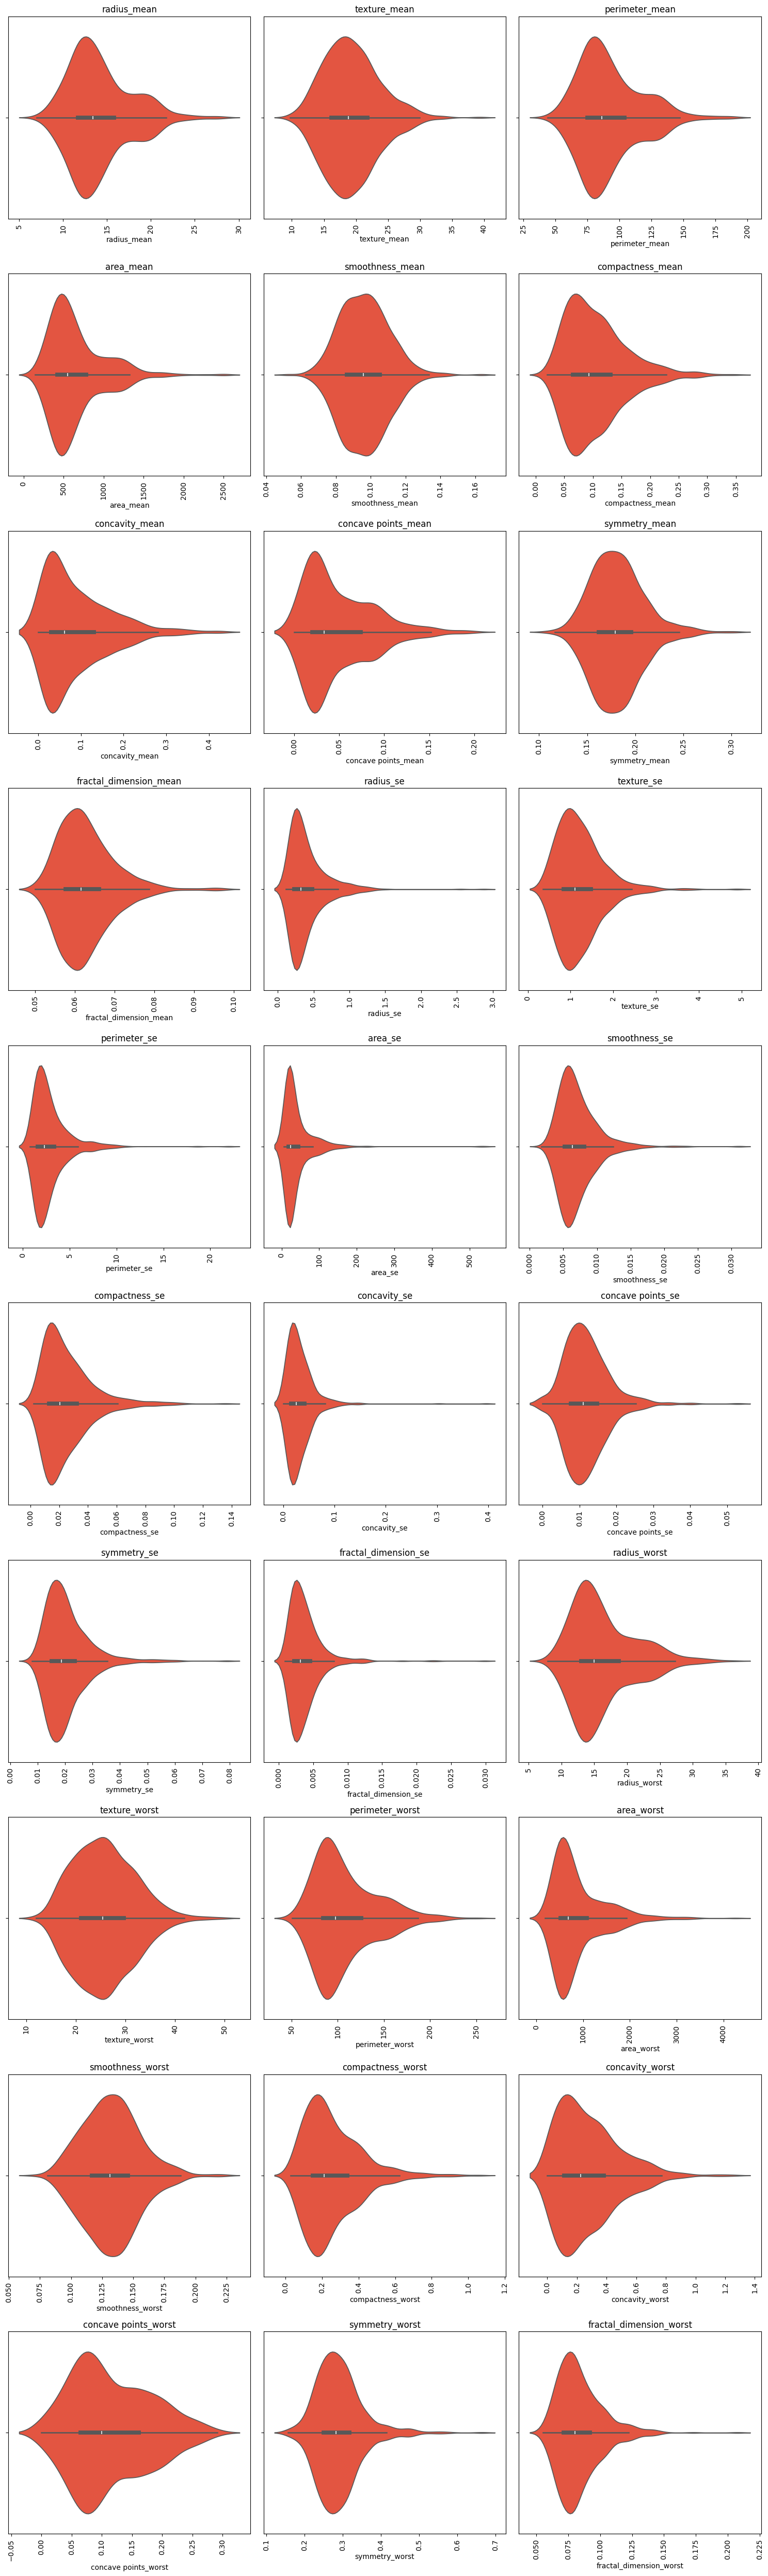

In [14]:
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Violin plot for each variables
for i, var in enumerate (column_name_list_num):
  sns.violinplot(x=var, data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var)
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Violin plot is a variation of box plot plus kernel density plot. A violin plot is created for each numerical column.

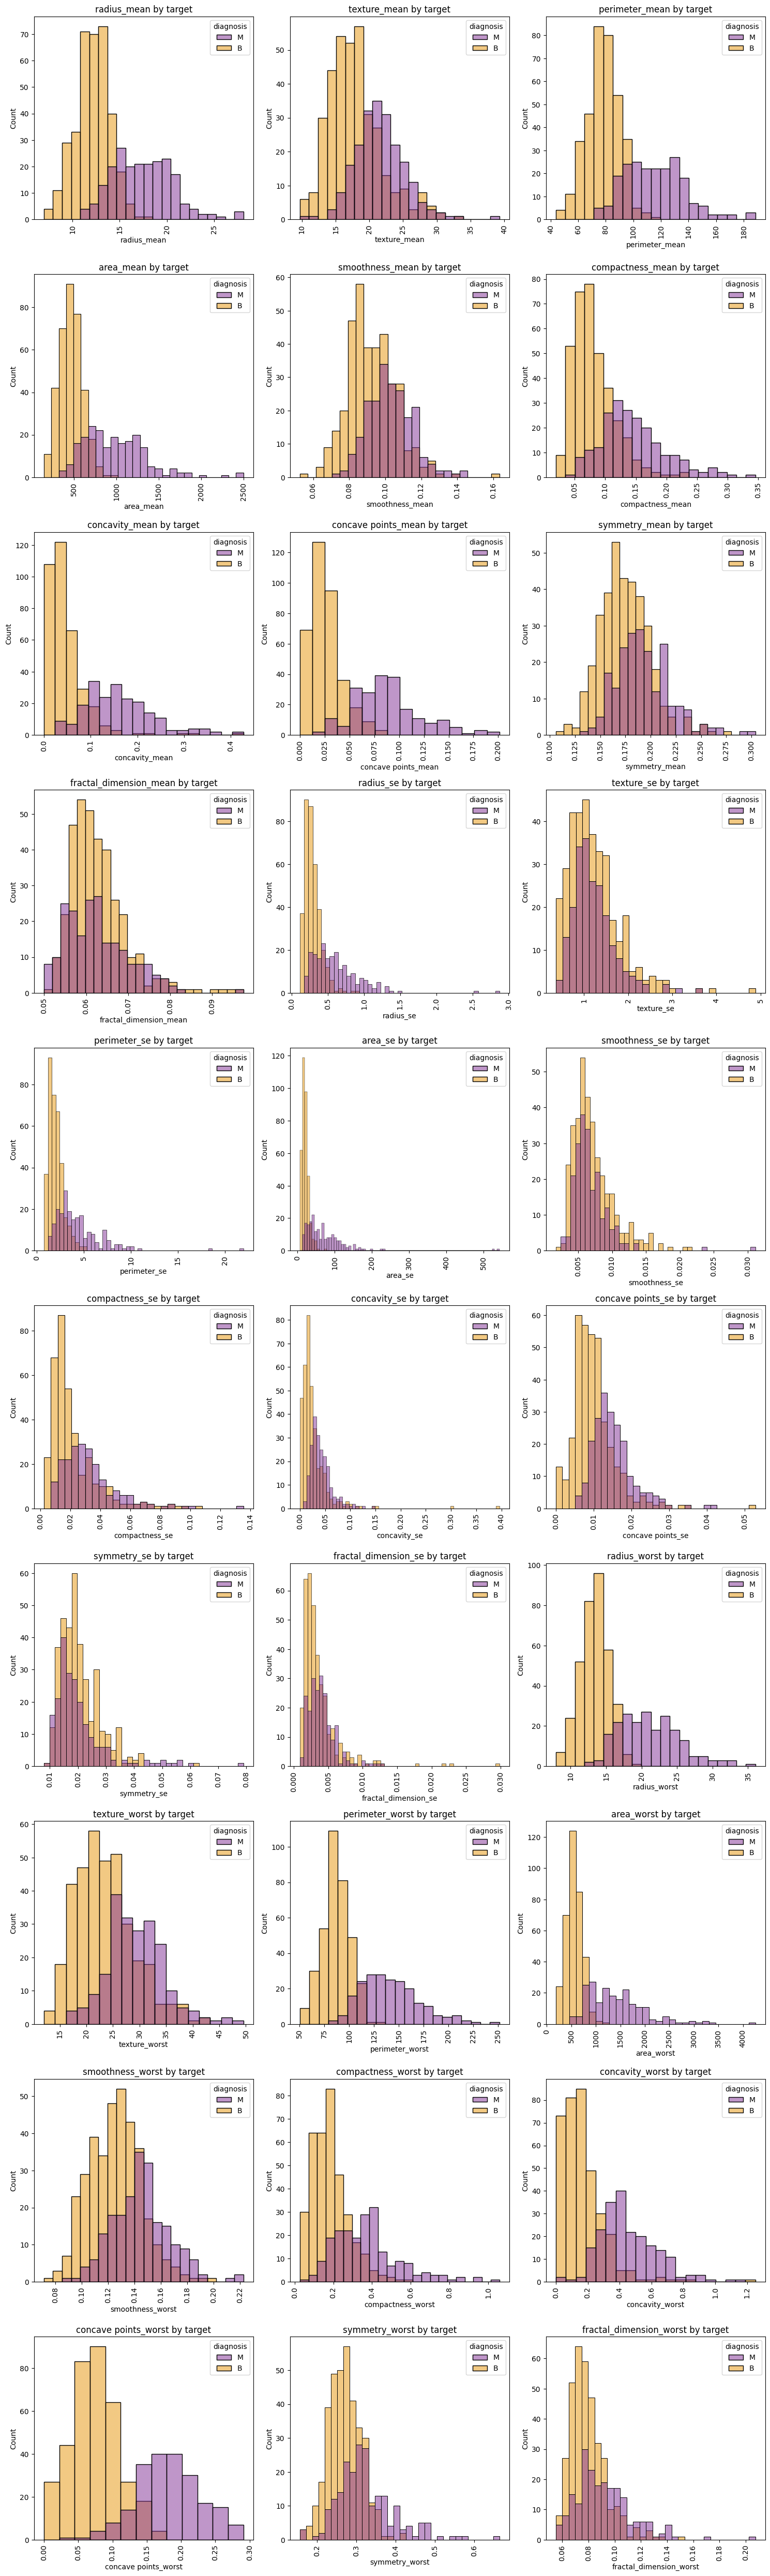

In [15]:
#Histogram overlay of 'diagnosis' with the independent variables
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Histplot for each variables
for i, var in enumerate (column_name_list_num):
  sns.histplot(x=var, hue = 'diagnosis', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title(var + " " + "by target")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Histograms are graphs to view data distribution patterns.Histograms were created for each numeric column with an overlay of diagnosis status to see the difference in the distribution of numeric data for each type of diagnosis.

It can be seen that in the dataset, the majority of patients with benign status have smaller tumor measurements.

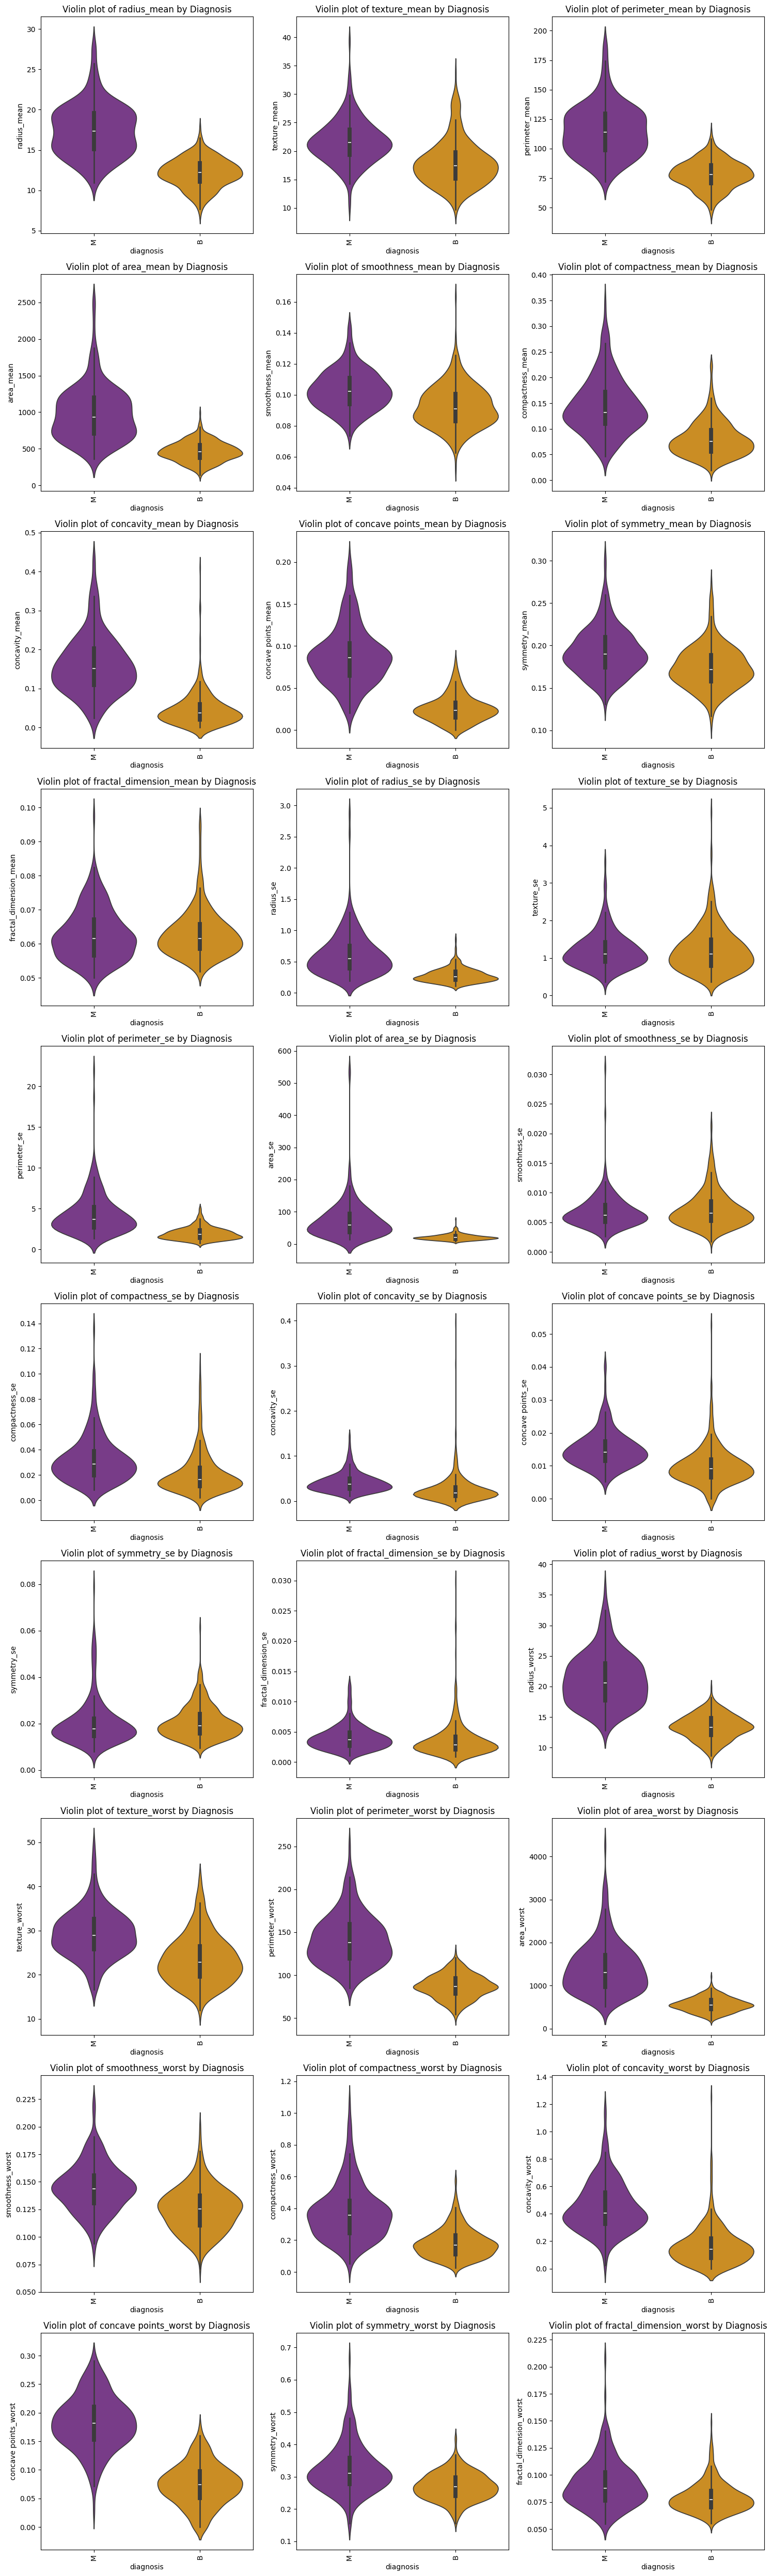

In [16]:
#Create subplots
num_cols = len(column_name_list_num)
num_rows = (num_cols + 2) // 3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15,5*num_rows))
axs = axs.flatten()

#Violin plot for each variables
for i, var in enumerate (column_name_list_num):
  sns.violinplot(y=var, x='diagnosis', data=df, palette = 'CMRmap', ax=axs[i])
  axs[i].set_title("Violin plot of" + " " + var + " " + "by Diagnosis")
  axs[i].tick_params(axis='x', rotation=90)

#Removes extra empty subplots
if num_cols < len(axs):
  for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

fig.tight_layout()
plt.show()

Violin plot for each numerical column with diagnosis status overlay to see the difference in numerical data distribution in each diagnosis type.

In [17]:
#Mean of each column values in each class
df.groupby(by = 'diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## Labelling Categorical Data

In [18]:
#Labeling categorical data
diagnosis = {
    "B": 0,
    "M": 1
}

df['diagnosis'] = df['diagnosis'].map(diagnosis)

Diagnosis results are categorical so they must be converted to numeric in order to use the model. Labeling the diagnosis column value with “B” = 0 and “M” = 1. Labeling is done by mapping values based on the dictionary that has been created.

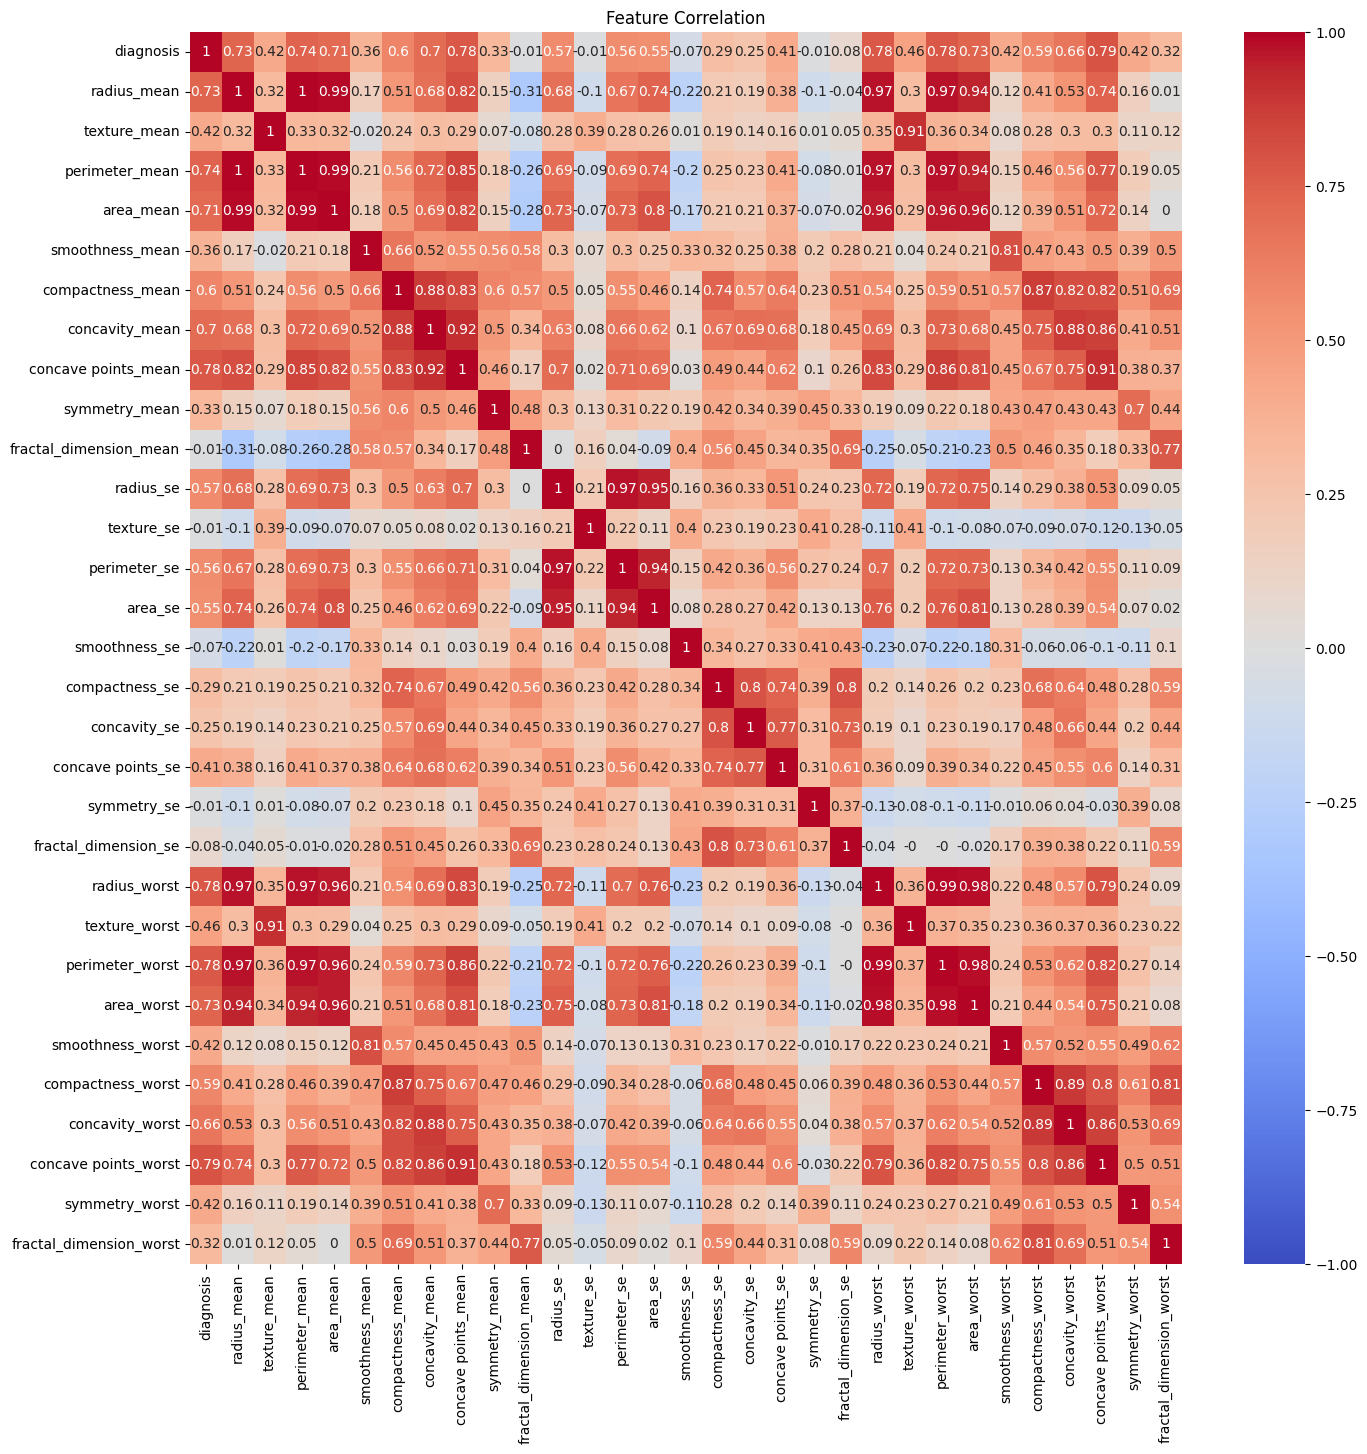

In [19]:
#Correlations between features
matrix = df.corr().round(2)
plt.figure(figsize=(16,16))
sns.heatmap(matrix, annot=True, vmax=1, vmin=-1, center=0, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

The correlation between numerical features can be seen in the figure above. The correlation value is rounded to 2 numbers behind zero. The higher the value, the stronger the correlation. A positive correlation means that it is directly proportional, if the correlation is negative then the correlation is inversely proportional.

## Balancing Data + Splitting the dataset into the Training set and Test set

In [20]:
#Defining x and y
x = df.drop(columns=['diagnosis'])
y = df['diagnosis']

The dataset is split into train and test with a ratio of 80:20.
The reason why this number is set is because 80/20 is generally considered good enough (unless the training data is very large, then the split data ratio may change). In this project dataset, the number of columns is not too large so enough training data is needed to ensure the model is well trained.


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

Data balancing is carried out with the SMOTE oversampling method because the amount of data is not balanced. Data balancing is done so that the model can achieve higher accuracy.

In [22]:
from imblearn.over_sampling import SMOTE
#define oversampling strategy
SMOTE = SMOTE()

#fit and apply the transform
x_train, y_train = SMOTE.fit_resample(x_train, y_train)

In [23]:
x_train.shape, x_test.shape

((572, 30), (114, 30))

## Modelling

### Gradient Boosting

In [45]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()

In [46]:
#Training the model
gb.fit(x_train, y_train)

GradientBoostingClassifier()

In [47]:
#Predict testing set
y_pred_gb = gb.predict(x_test)

In [48]:
print('Training-set accuracy score:', gb.score(x_train, y_train))
print('Test-set accuracy score:', gb.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.956140350877193


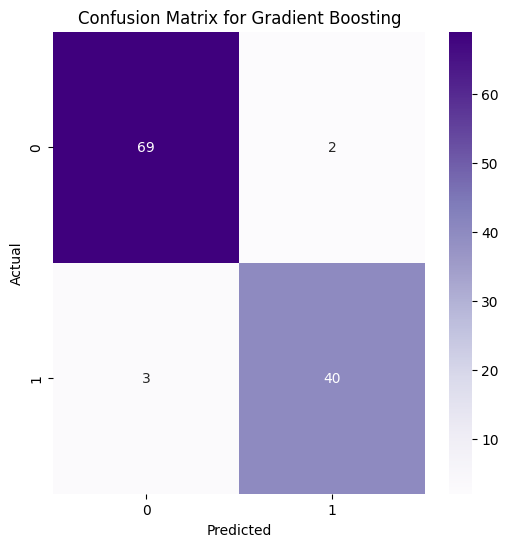

In [49]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_gb), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting')
plt.show()

In [50]:
#Check model performance using classification_report
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [51]:
#Specificity
cm = confusion_matrix(y_test, y_pred_gb)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.9302325581395349


In [52]:
#Check model performance using auc score
roc_auc_score(y_test, y_pred_gb)*100

95.10317720275138

### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
classifier_rf.fit(x_train, y_train)
y_pred_rf = classifier_rf.predict(x_test)

In [54]:
print('Training-set accuracy score:', classifier_rf.score(x_train, y_train))
print('Test-set accuracy score:', classifier_rf.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9736842105263158


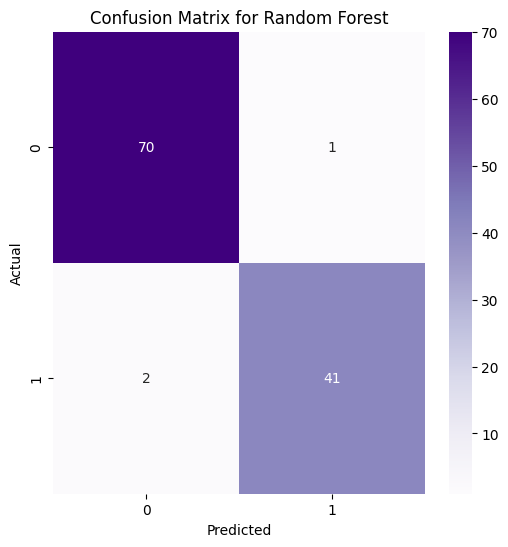

In [55]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_rf), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Random Forest')
plt.show()

In [56]:
#Classification report
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [57]:
#Specificity
cm = confusion_matrix(y_test, y_pred_rf)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.9534883720930233


In [58]:
roc_auc_score(y_test, y_pred_rf)*100

96.97019325253848

### Stacking Model

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

base_models = [('Decision Tree',DecisionTreeClassifier()),('Logistic Regression',LogisticRegression()), ('Random Forest', RandomForestClassifier()), ('xgb', XGBClassifier())]
stacking = StackingClassifier(estimators = base_models, final_estimator = LogisticRegression(), cv = 5)
stacking.fit(x_train , y_train)

StackingClassifier(cv=5,
                   estimators=[('Decision Tree', DecisionTreeClassifier()),
                               ('Logistic Regression', LogisticRegression()),
                               ('Random Forest', RandomForestClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categori...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))],
                   final_estimator=LogisticRegression())

In [60]:
y_pred_st = stacking.predict(x_test)

In [61]:
print('Training-set accuracy score:', stacking.score(x_train, y_train))
print('Test-set accuracy score:', stacking.score(x_test, y_test))

Training-set accuracy score: 1.0
Test-set accuracy score: 0.9649122807017544


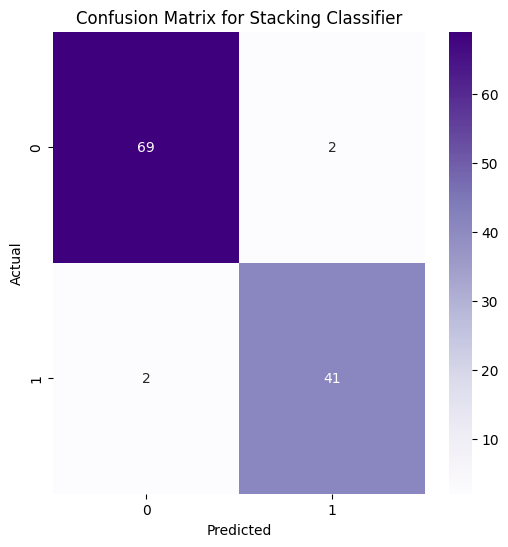

In [62]:
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_st), annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Stacking Classifier')
plt.show()

In [63]:
#Classification report
print(classification_report(y_test, y_pred_st))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.95      0.95      0.95        43

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [64]:
#Specificity
cm = confusion_matrix(y_test, y_pred_st)

specificity = cm[1,1]/(cm[1,0] + cm[1,1])
print('Specificity : ', specificity)

Specificity :  0.9534883720930233


In [65]:
roc_auc_score(y_test, y_pred_st)*100

96.2659679004258

# **Conclusion**

Based on the results of the evaluation metrics, the best model is **Random Forest** with a slightly higher difference in metric results than Gradient Boosting and Stacking Classifier.
In the health context, recall (sensitivity) and specificity values are taken into consideration as these affect the diagnosis of a disease. The Random Forest model has the highest value on these two metrics, it is hoped that this can help the accuracy of patient diagnosis and reduce false positive results so as not to waste hospital resources and ensure patients with cancer get fast treatment.
